# Shuffling of simple and twisted read pairs

## Description of the analysis

In this notebook, we use the script [```diachrscripts/simulate_interactions_script.py```](https://github.com/TheJacksonLaboratory/diachrscripts/blob/master/simulate_interactions_script.py) to generate two interaction files supplemented with binomial P-values. One file contains the original interactions, the other file contains interactions with the same coordinates but with randomly shuffled proportions of simple and twisted read pairs, for instance, if the original interaction has one simple and five twisted read pairs, a new number of simple read pairs is drawn from ```binom.rvs(6, 0.5)```, which could result in four simple and consequently two twisted read pairs.

Apart from the interactions files, numpy arrays with P-values for original and simulated data are saved to disk that can be loaded into this notebook in order examine the distribution of P-values using, for instance, a qq-plot.

## Choose dataset

We analyzed four datasets, three capture Hi-C (Mifsud 2015, Schoenfelder 2015, Chesi 2019) and one Hi-C dataset (Nora 2017). In this section, individual datasets can be selected for the analysis that can be performed in the third section of this notebook.

### Mifsud 2015 (Promoter capture Hi-C, GM12878 and CD34+ blood cells, hg38, HindIII)

In [1]:
# Create output directory
!mkdir -p ../results/mifsud/simulated_interactions

#### Replicate 1

In [27]:
OUT_PREFIX = "../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r1"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2

In [22]:
OUT_PREFIX = "../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r2"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3

In [3]:
OUT_PREFIX = "../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r3"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R30.interaction.counts.table.gt1.tsv.gz"

### Schoenfelder 2015 (Promoter capture Hi-C, mES cells, mm10, HindIII)

In [ ]:
# Create output directory
!mkdir -p ../results/schoenefelder/simulated_interactions

#### Replicate 1

In [3]:
OUT_PREFIX = "../results/schoenefelder/simulated_interactions/simulated_interactions_schoenefelder_r1"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R10.interaction.counts.table.gt1.tsv.gz

#### Replicate 2

In [3]:
OUT_PREFIX = "../results/schoenefelder/simulated_interactions/simulated_interactions_schoenefelder_r2"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R20.interaction.counts.table.gt1.tsv.gz

### Chesi 2019 (Promoter Capture-C, BMP2 induced osteoblasts and HepG2 cells, hg38, DpnII)

#### Replicate 1

## Perform analysis

In [49]:
# Run Python script
!python ../simulate_interactions_script.py --out-prefix $OUT_PREFIX --interaction-file $INTERACTION_FILE

[INFO] Input parameters
	[INFO] Analysis for: ../results/mifsud/simulated_interactions/simulated_interactions_mifsud_r1
	[INFO] Interaction file: ../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz
[INFO] Simulating random simple twisted read pairs for each interaction in ../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz ...
	[INFO] 0 interactions processed ...
	[INFO] 1000000 interactions processed ...
... done.
[INFO] Summary statistics
	[INFO] Total number of interactions: 1175807
	[INFO] Number of trans short range interactions (discarded): 181256
	[INFO] Number of simple interactions (original vs. simulated): 3919	2637
	[INFO] Number of twisted interactions (original vs. simulated): 3380	2731
	[INFO] Number of undirected interactions (original vs. simulated): 104692	106623
	[INFO] Number of indefinable interactions (original vs. simulated): 882560	882560
[INFO] Writing numpy arrays with dis

In [12]:
# Load modules
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab

In [6]:
# Load saved numpy arrays from disk
array_path = OUT_PREFIX + "_original_pvals.npy"
pval_array_original = np.load(array_path)
array_path = OUT_PREFIX + "_simulated_pvals.npy"
pval_array_simulated = np.load(array_path)

[(0, 1), Text(0, 0.5, 'Simulated data'), (0, 1), Text(0.5, 0, 'Original data')]

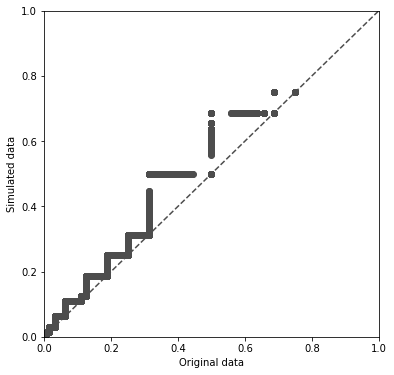

In [45]:
# Create scatterplot of original and simulated data for the range 0.0, ..., 1.0
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.sort(pval_array_original), np.sort(pval_array_simulated), c=".3")
ax.plot([0, 1], [0, 1], ls="--", c=".3")
ax.set(xlim=(0, 1), ylim=(0, 1), xlabel="Original data", ylabel="Simulated data")

[(0, 0.1),
 Text(0, 0.5, 'Simulated data'),
 (0, 0.1),
 Text(0.5, 0, 'Original data')]

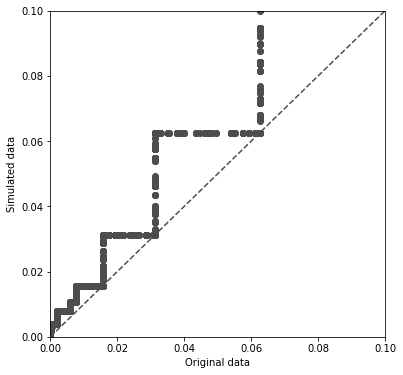

In [48]:
# Create scatterplot of original and simulated data for the range 0.0, ..., 0.1
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.sort(pval_array_original), np.sort(pval_array_simulated), c=".3")
ax.plot([0, 0.1], [0, 0.1], ls="--", c=".3")
ax.set(xlim=(0, 0.1), ylim=(0, 0.1), xlabel="Original data", ylabel="Simulated data")

((array([6.96944590e-07, 1.69171755e-06, 2.69719604e-06, ...,
         9.99997303e-01, 9.99998308e-01, 9.99999303e-01]),
  array([1.11022302e-16, 1.11022302e-16, 4.06896739e-13, ...,
         7.50000000e-01, 7.50000000e-01, 7.50000000e-01])),
 (0.7689475236861079, 0.06054447404482394, 0.9528224491786607))

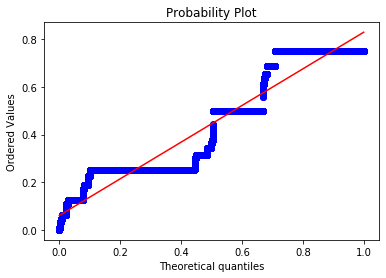

In [32]:
stats.probplot(pval_array_original, dist="uniform", plot=pylab)

((array([6.96944590e-07, 1.69171755e-06, 2.69719604e-06, ...,
         9.99997303e-01, 9.99998308e-01, 9.99999303e-01]),
  array([2.44140625e-04, 4.55260277e-04, 4.88281250e-04, ...,
         7.50000000e-01, 7.50000000e-01, 7.50000000e-01])),
 (0.7721901603225021, 0.0764147499339885, 0.955776935567964))

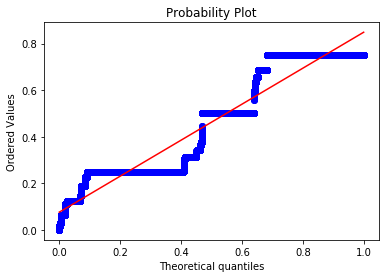

In [33]:
stats.probplot(pval_array_simulated, dist="uniform", plot=pylab)